# BasicSegmentation # 

File Purpose:
- This file contains a pipeline for processing tissue images to extract glands, using only basic raster data processing techniques — without applying any neural networks.
  
Goal:
- To evaluate the potential of what can be achieved using traditional image processing methods before moving on to training a neural network.

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [5]:
def show(img, title="", axes=False):
    if not axes:
        plt.axis("off")
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    plt.title(title)

def show_images(img_list, cols=1, title_list=[], dpi_val=100, axes=False):
    img_size = 5
    total = len(img_list)
    if len(title_list) == 0:
        title_list = [' '] * total
    rows = np.ceil(total / cols).astype(int)
    figsize_cols = img_size * cols
    figsize_rows = img_size * rows
    plt.figure(figsize=(figsize_cols, figsize_rows), dpi=dpi_val)
    for i in range(total):
        if isinstance(img_list[i], np.ndarray):
            plt.subplot(rows, cols, i + 1)
            show(img_list[i], title_list[i], axes)
    plt.show()

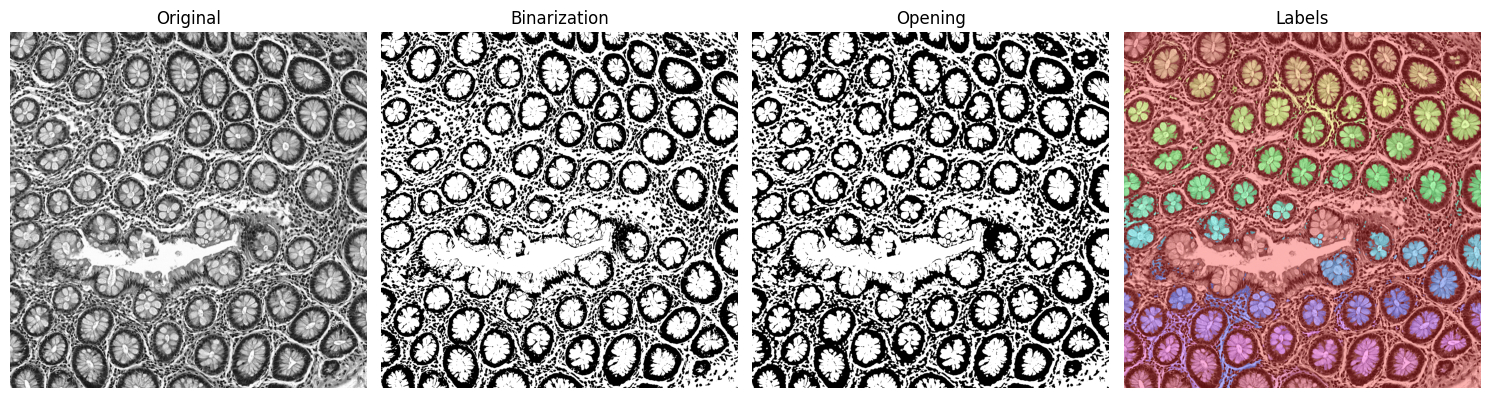

Number of detected objects: 723


In [6]:
image = cv2.imread('../temp/patient0.tif', cv2.IMREAD_GRAYSCALE)
_, thresh = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
num_labels, labels = cv2.connectedComponents(opening, connectivity=8)

hsv = np.zeros((*labels.shape, 3), dtype=np.uint8)
hsv[..., 1] = 255
hsv[..., 2] = 255

for label in range(1, num_labels):
    hsv[labels == label, 0] = int(179 * label / num_labels)

color_labels = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
original_bgr = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
alpha = 0.3
blended = cv2.addWeighted(original_bgr, 1 - alpha, color_labels, alpha, 0)

titles = ['Original', 'Binarization', 'Opening', 'Labels']
images = [image, thresh, opening, cv2.cvtColor(blended, cv2.COLOR_BGR2RGB)]

plt.figure(figsize=(15, 5))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    if i < 3:
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Number of detected objects: {num_labels - 1}")

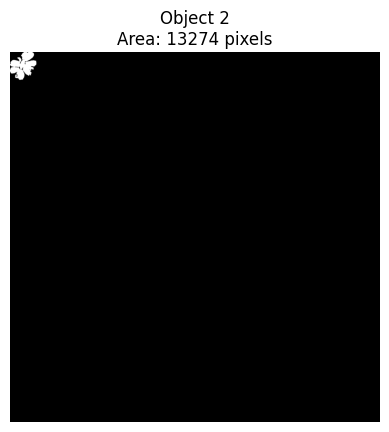

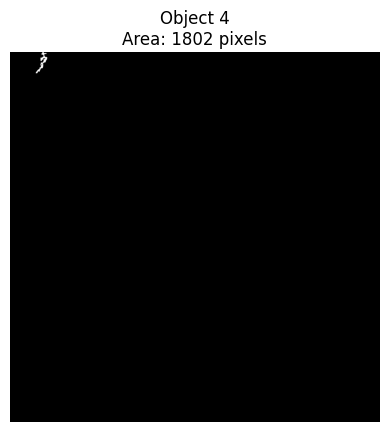

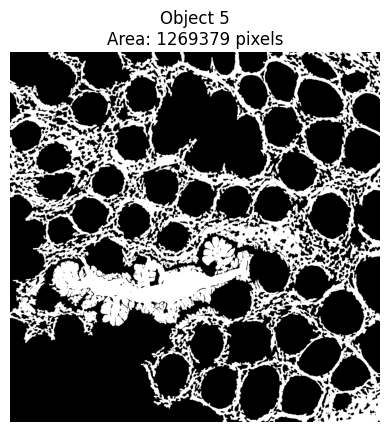

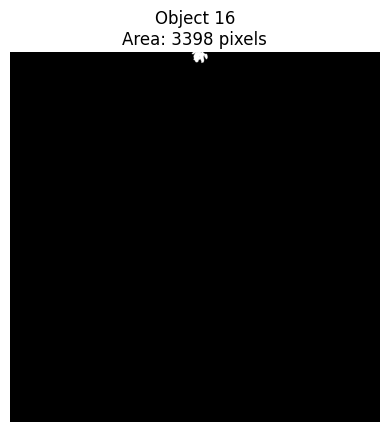

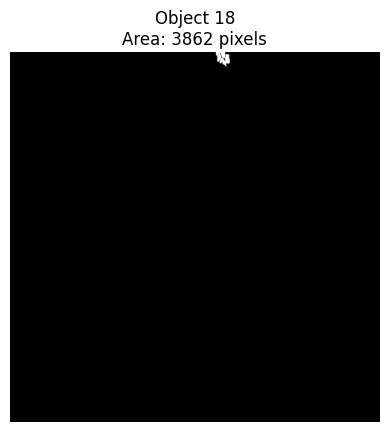

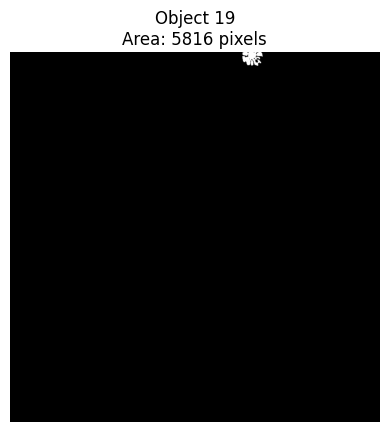

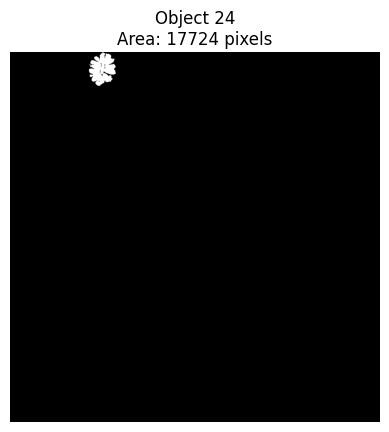

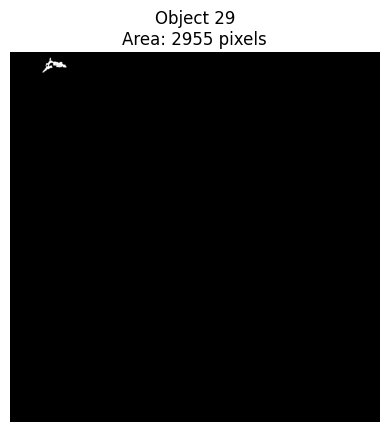

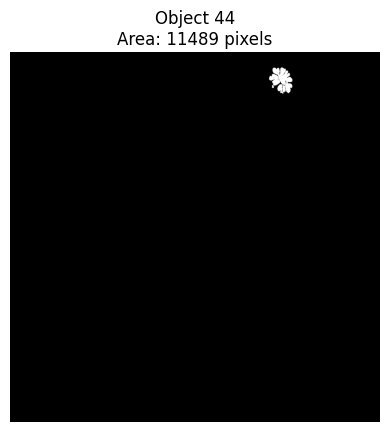

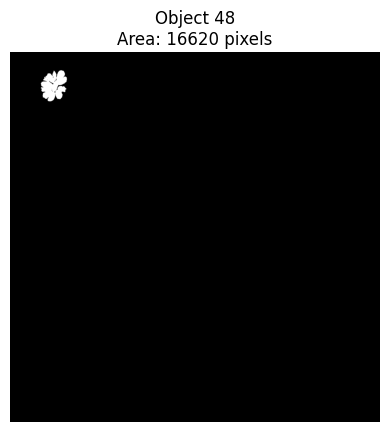

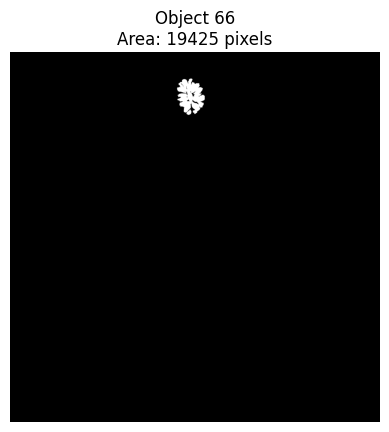

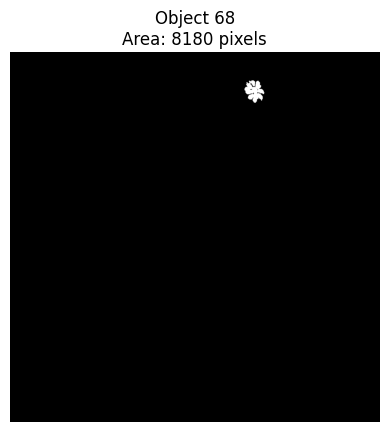

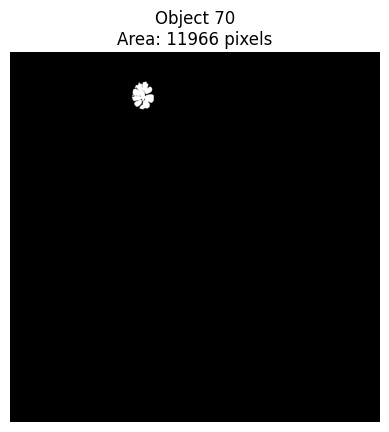

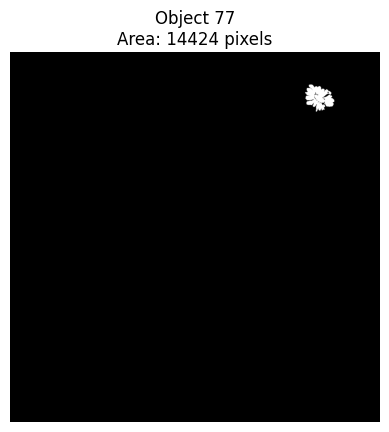

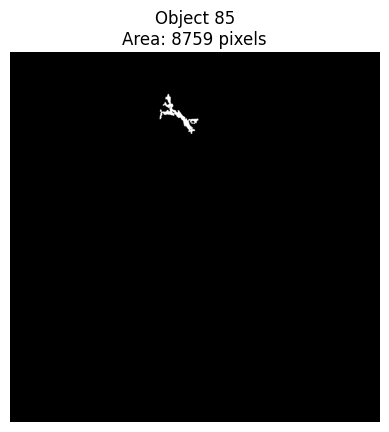

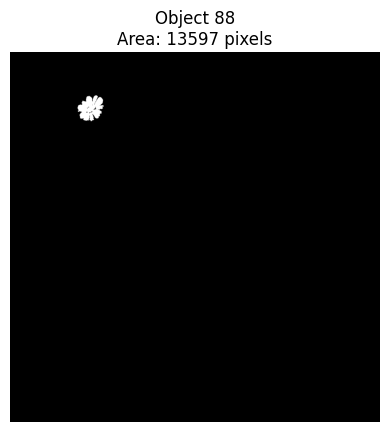

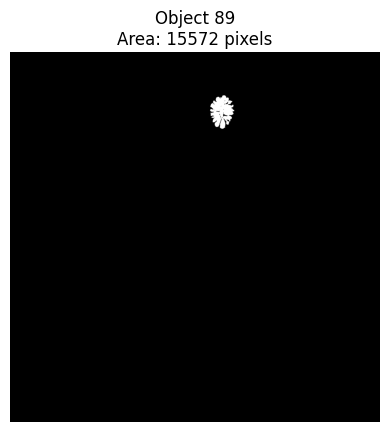

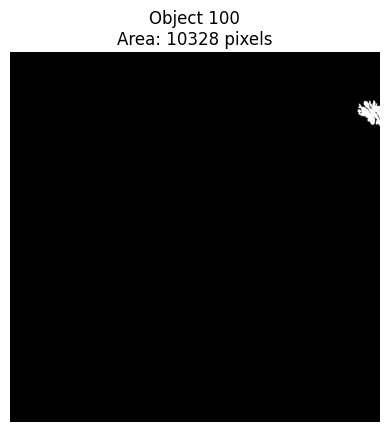

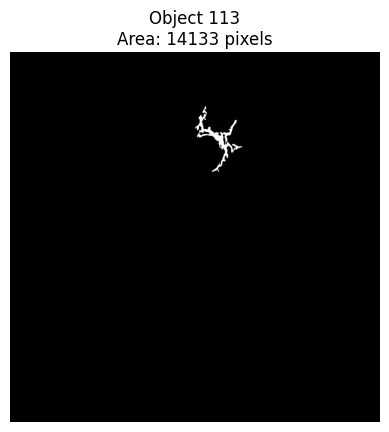

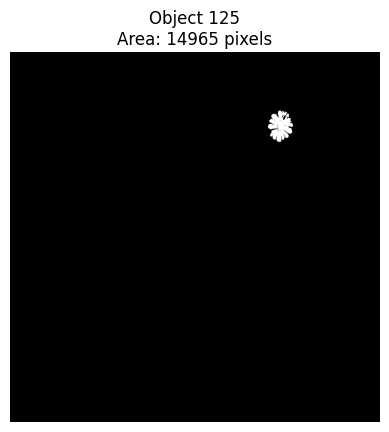

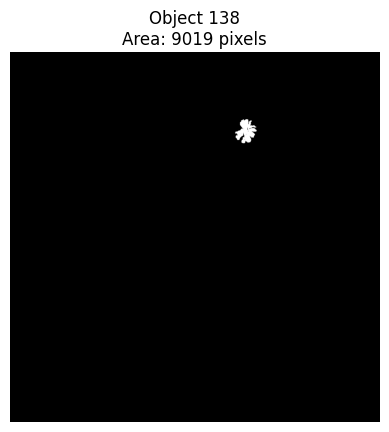

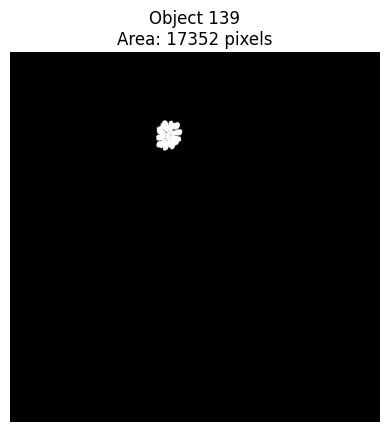

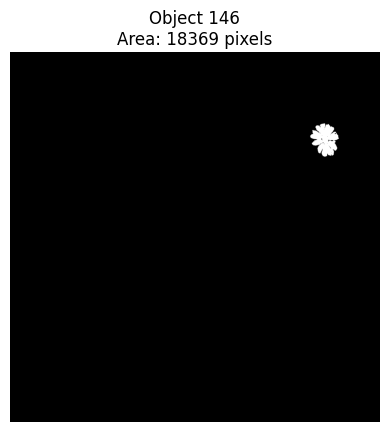

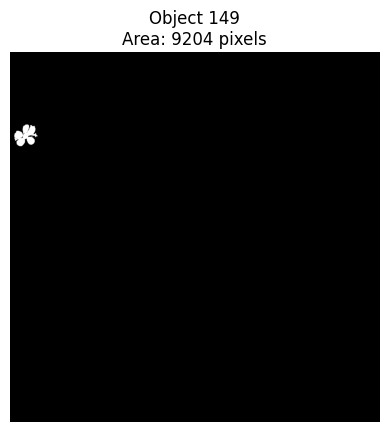

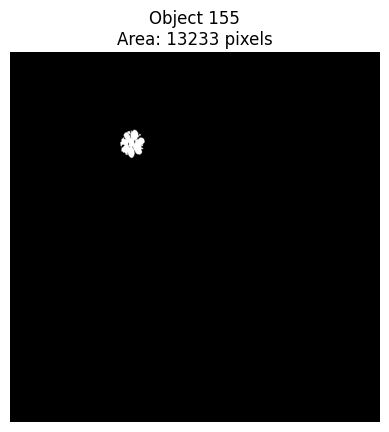

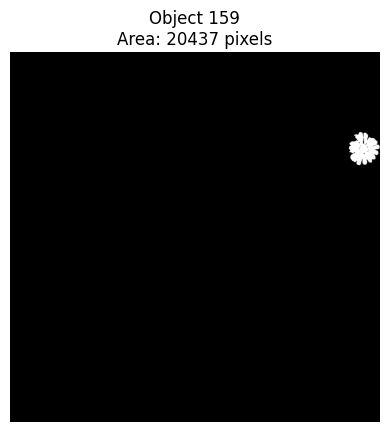

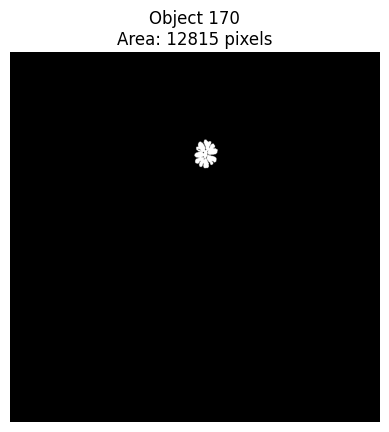

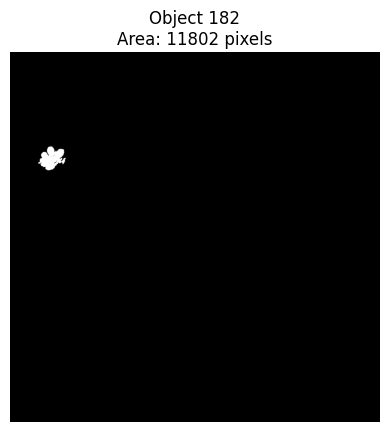

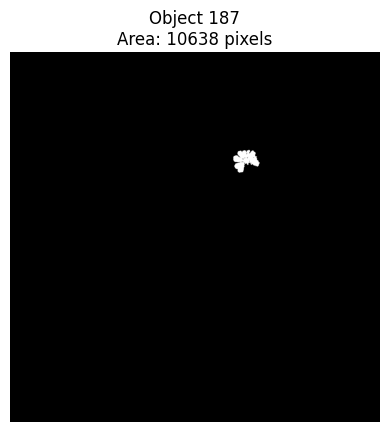

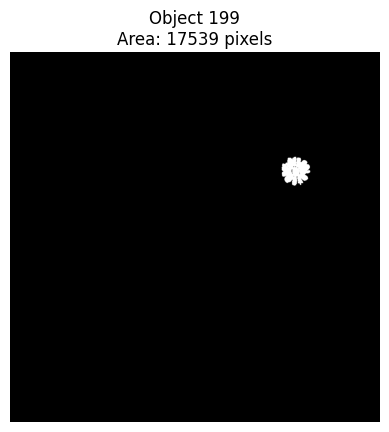

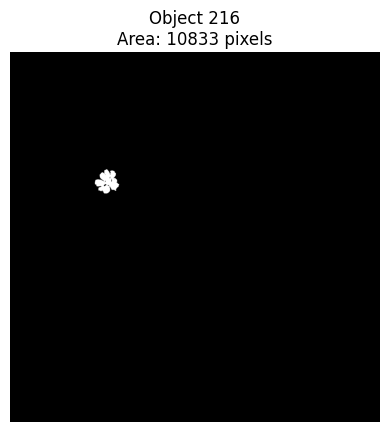

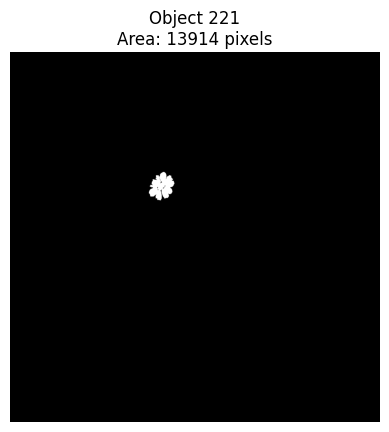

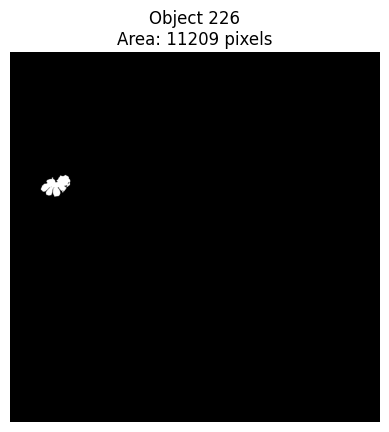

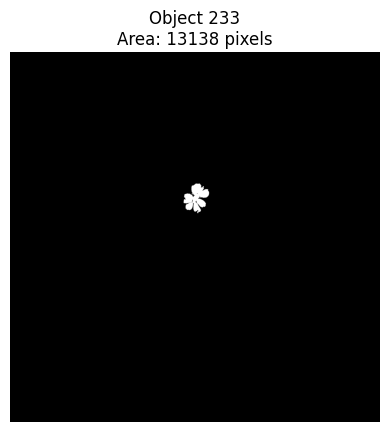

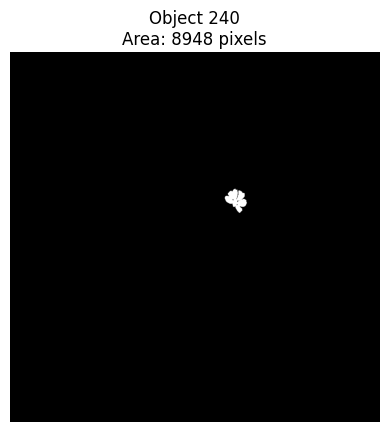

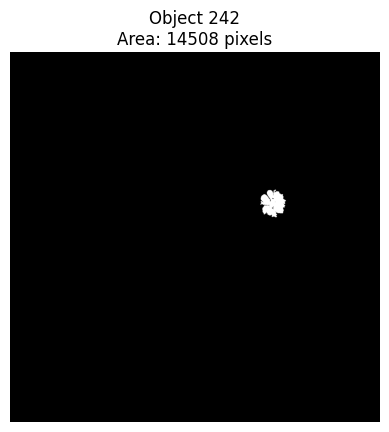

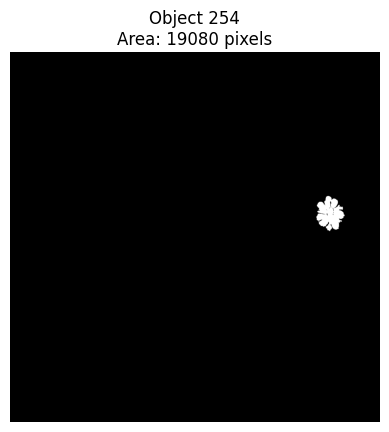

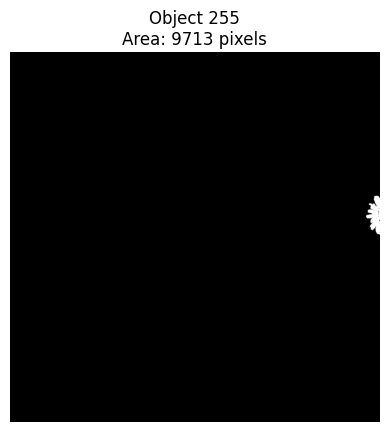

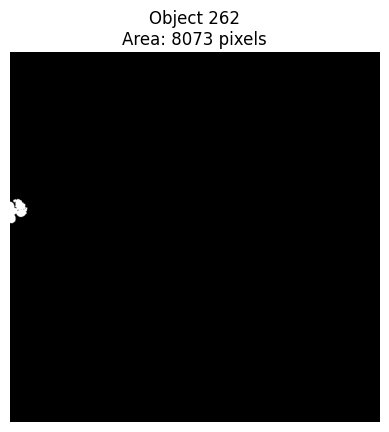

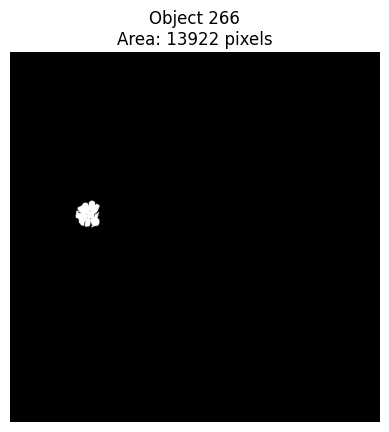

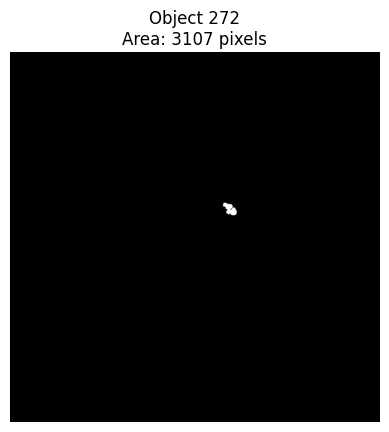

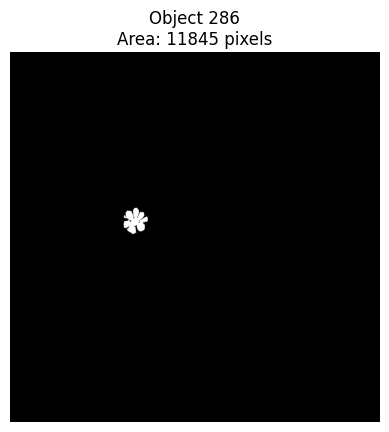

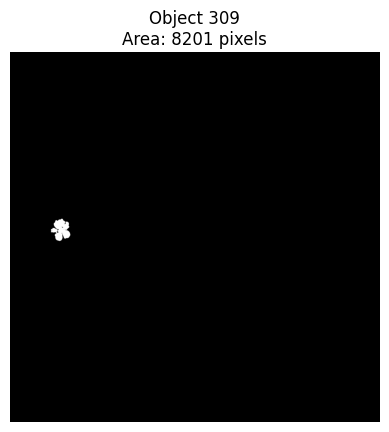

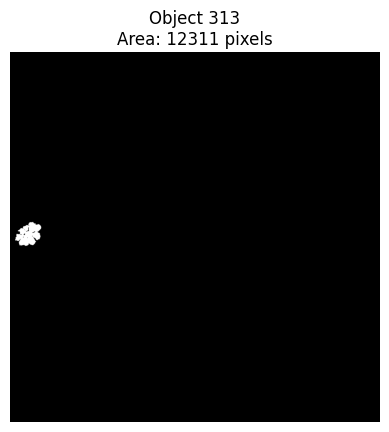

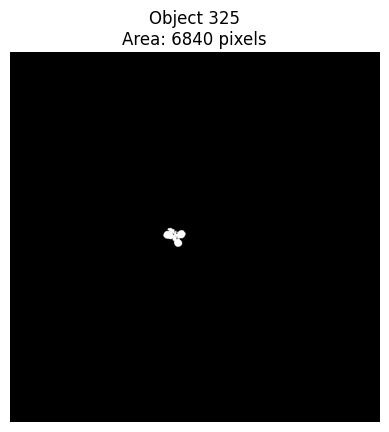

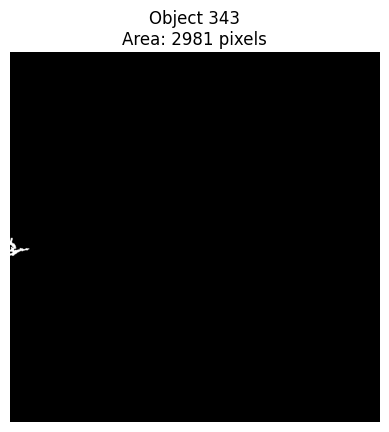

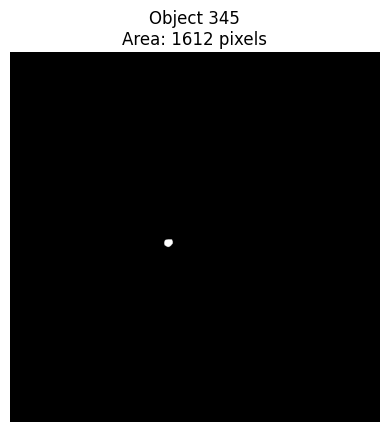

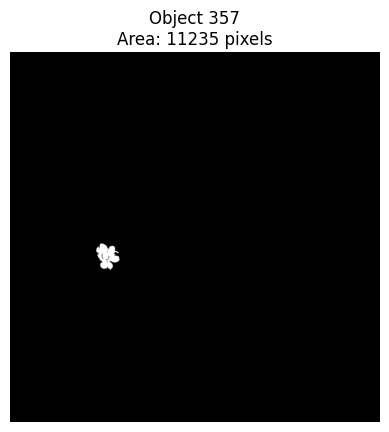

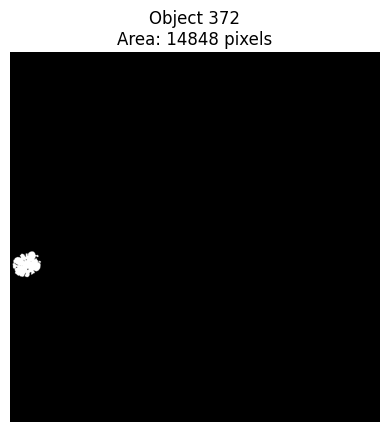

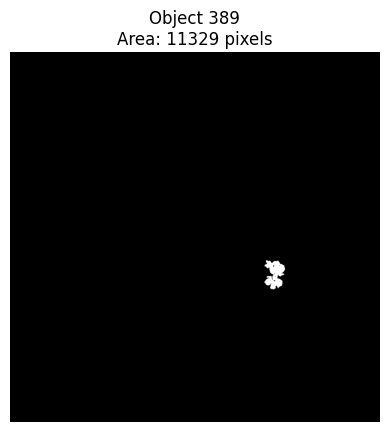

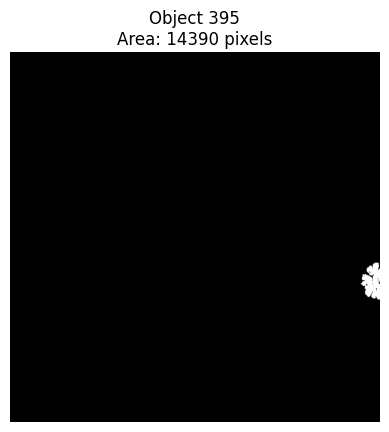

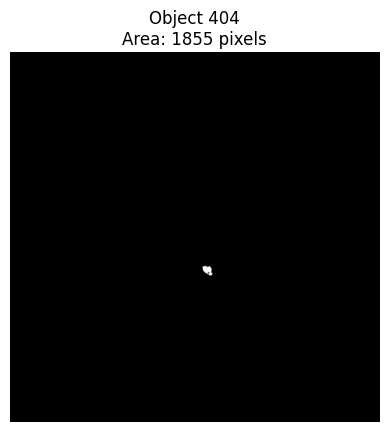

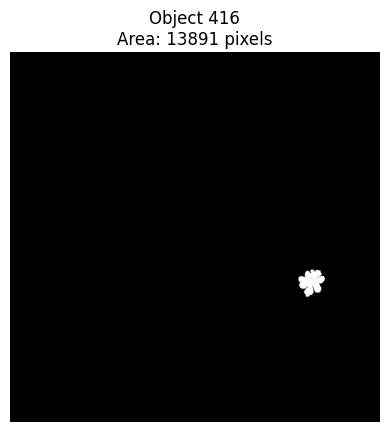

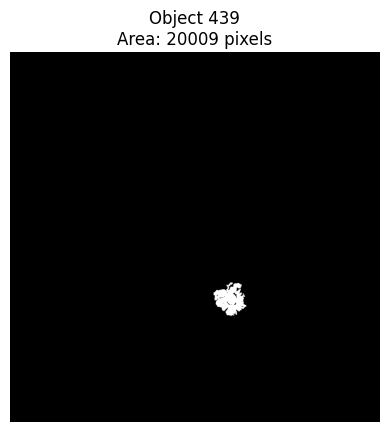

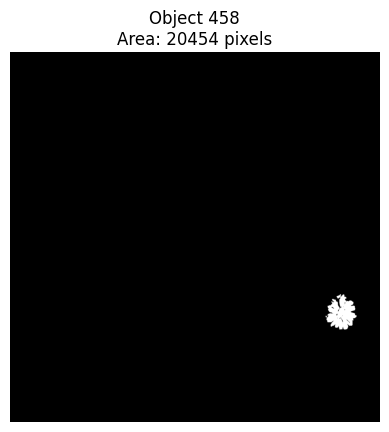

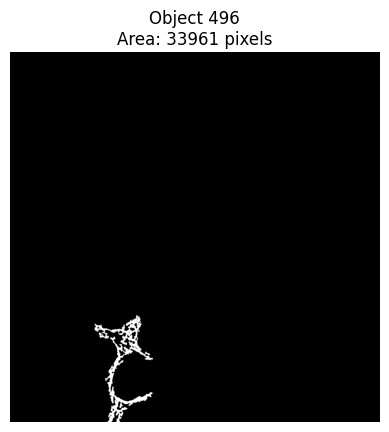

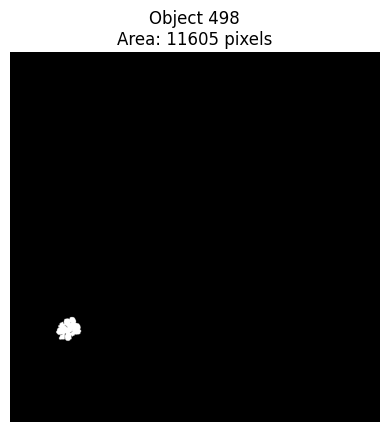

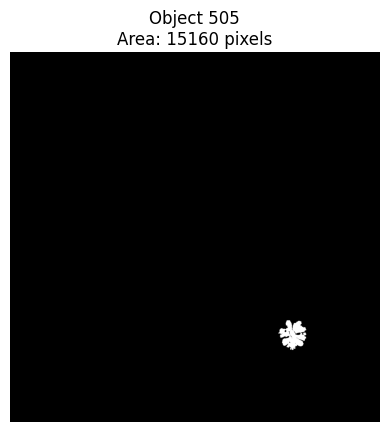

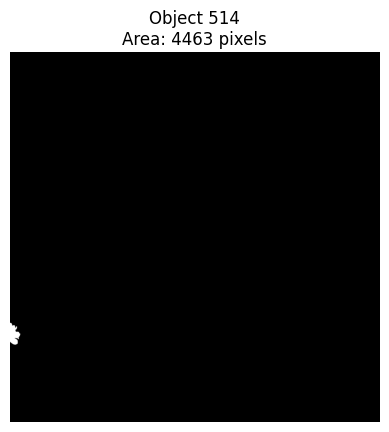

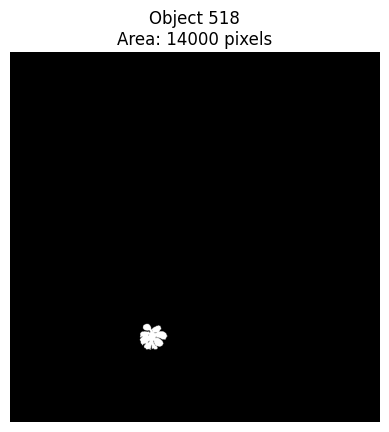

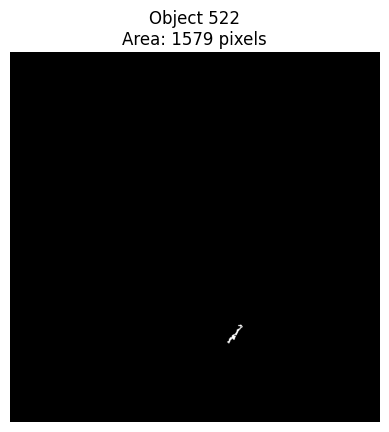

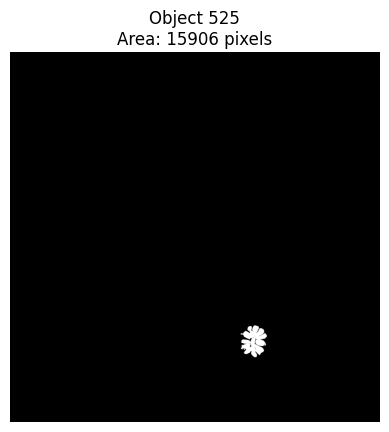

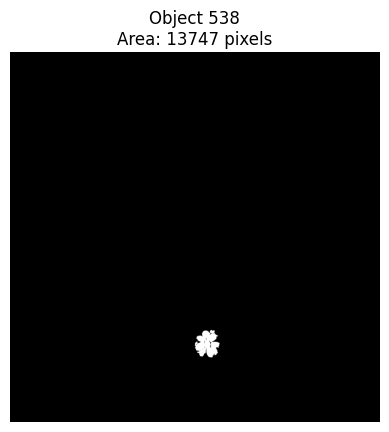

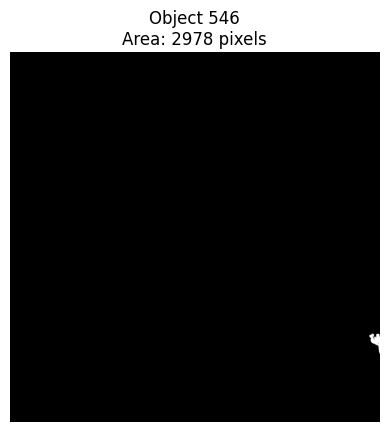

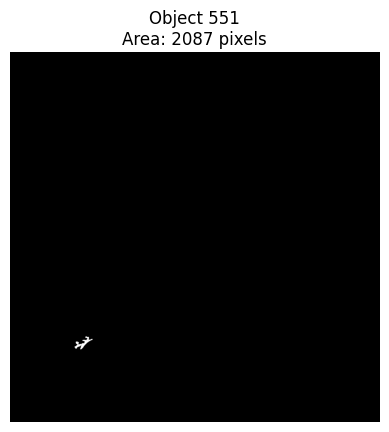

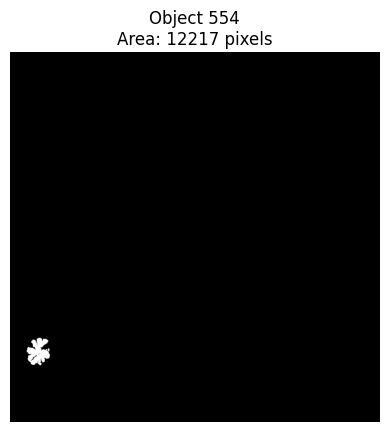

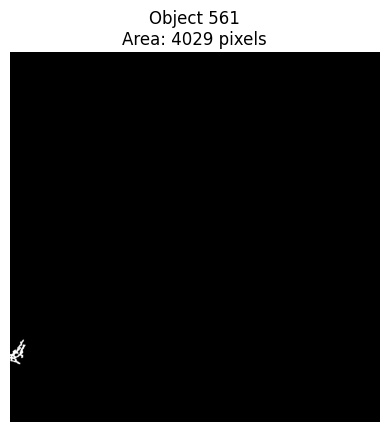

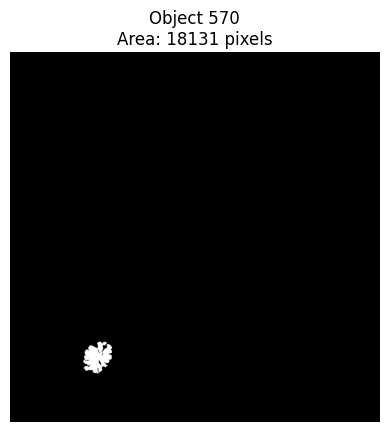

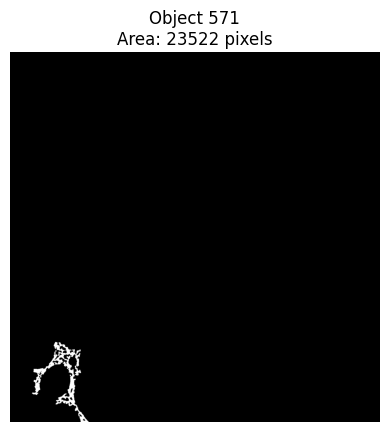

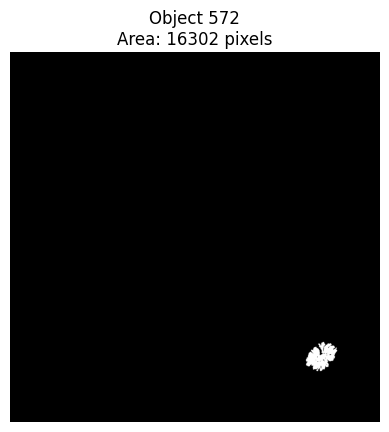

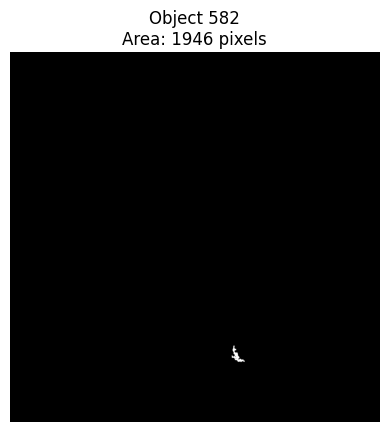

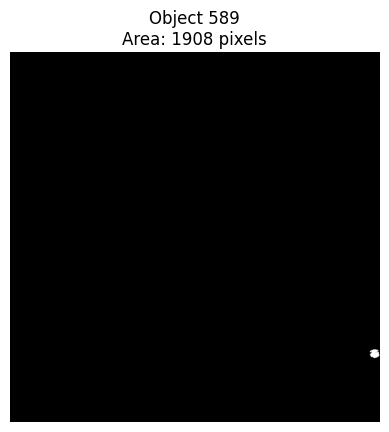

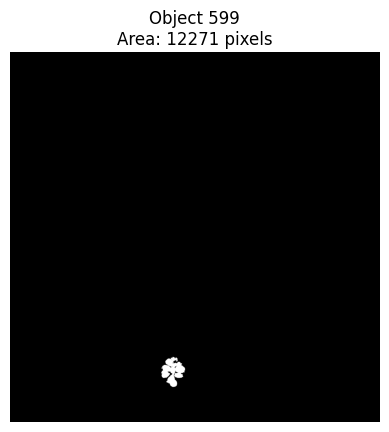

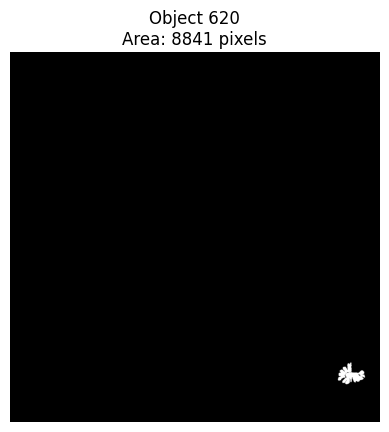

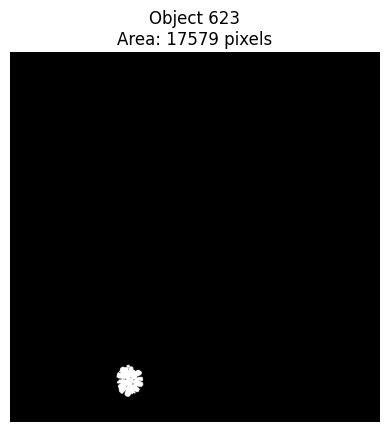

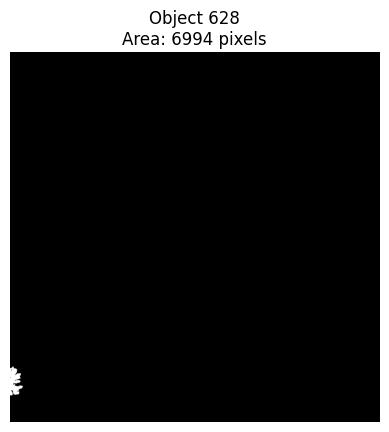

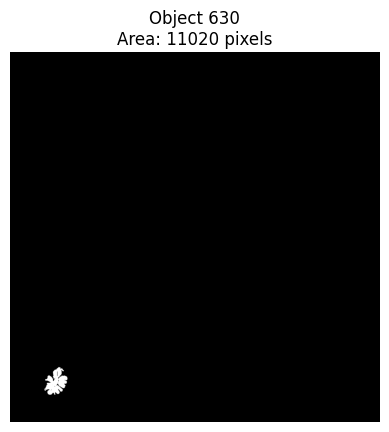

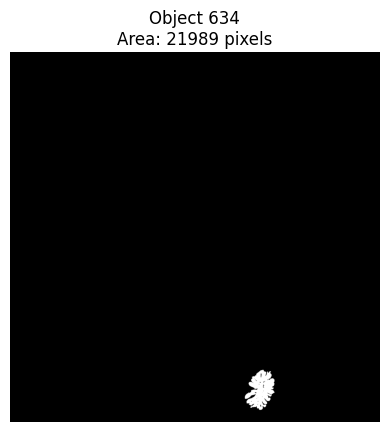

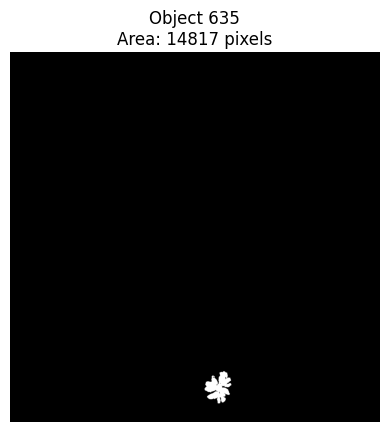

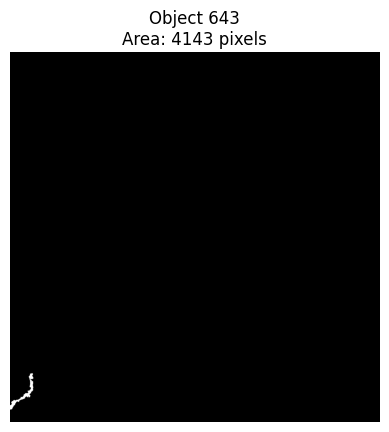

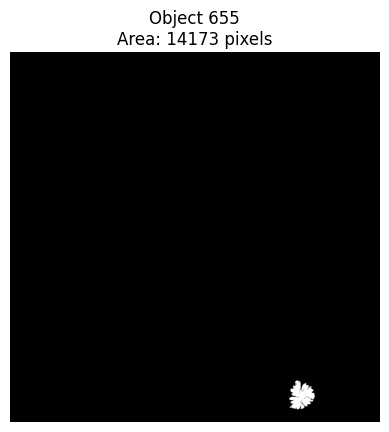

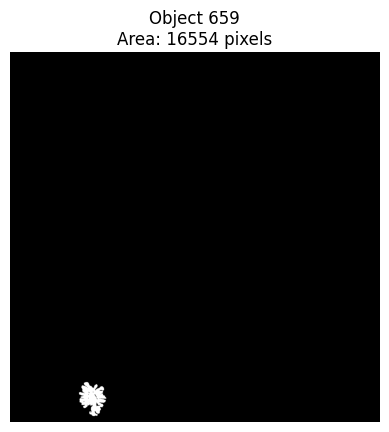

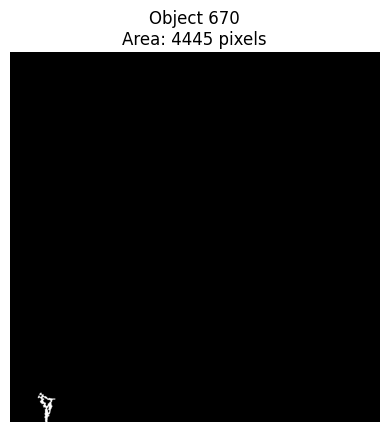

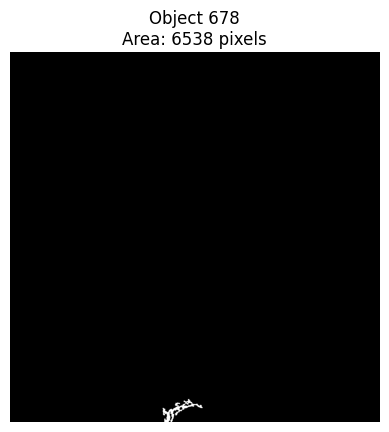

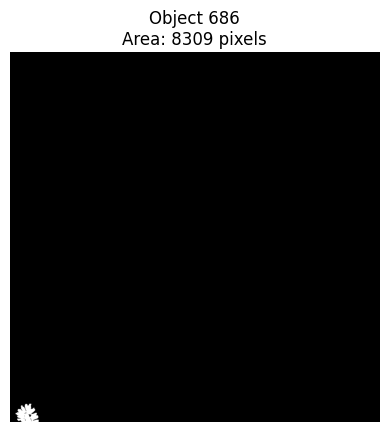

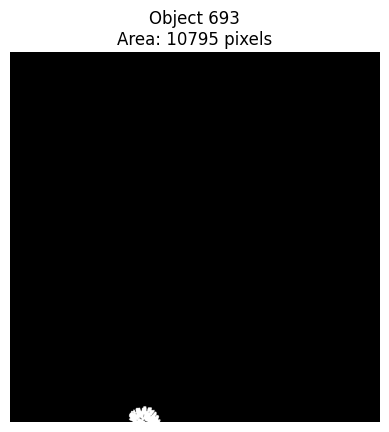

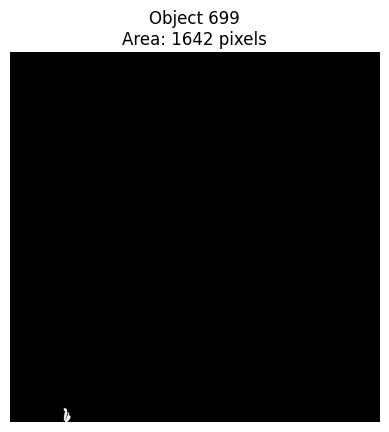

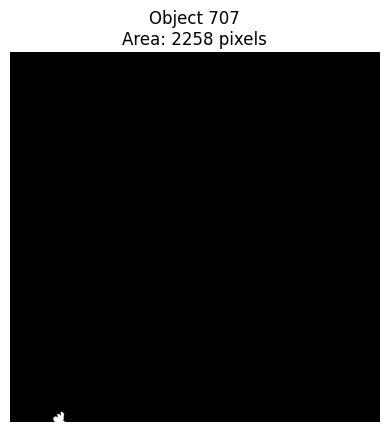

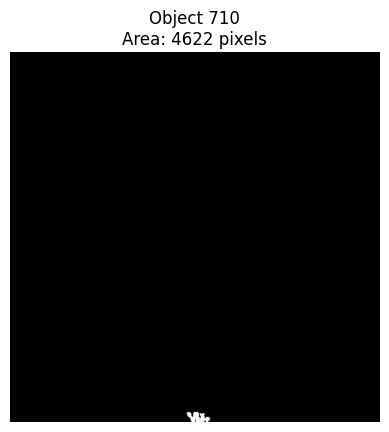

In [8]:
for label in range(1, num_labels):
    area = np.count_nonzero(labels == label)
    if area > 1500:
        mask = np.where(labels == label, 255, 0).astype(np.uint8)
        plt.imshow(mask, cmap='gray')
        plt.title(f'Object {label}\nArea: {area} pixels')
        plt.axis('off')
        plt.show()